# <center> Lecture 04 - Linear Regression</center>

<p><a name="sections"></a></p>


## Sections

- <a href="#linear">Linear Regression</a><br>
 - <a href="#coeff">The Coefficients</a><br>
 - <a href="#error">The Errors</a><br>
   - <a href="#assumption">The Basic Assumptions on Linear Regression</a><br>
 - <a href="#estimate">Estimating the Coefficients</a><br>
    - <a href="#residual">Residuals</a><br>
    - <a href="#formula">The Formula for the Coefficients</a><br>
 - <a href="#rsquare">Evaluating the Model: Coefficient of Determination</a><br>
 - <a href="#reg_sklearn">Linear Regression in Scikit-Learn</a><br>
- <a href="#multi_reg">Multiple Linear Regression - Model</a><br>
 - <a href="#matrix">Least Square in Matrix Notation</a><br>
 - <a href="#multi_sklearn">Multiple Linear Regression in Scikit-Learn</a><br>
 - <a href="#case">Case Study</a><br>
    - <a href="#descriptive">Descriptive Statistics</a><br>
    - <a href="#dummy">Categorical Input Variables</a><br>
- <a href="#MLE">Maximum Likelihood Estimation</a><br>
 - <a href="#gaussian">Gaussian Distribution</a><br>
 - <a href="#gradient">Gradient Descent</a><br>
- <a href="#overfit">Overfit vs. Underfit</a><br>

In [2]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<p><a name="linear"></a></p>

## Linear Regression

Linear regression is a supervised machine learning method that aims to uncover the relationship between continuous variables:

- One or more explanatory/independent/input variables $X_1, X_2,..., X_p$.
- The response/dependent/output variable Y.


**Simple linear regression** is a special case when there is only one explanatory variable $X$. In this case, the relation can be represented quantitatively by:
$$
Y = \beta_0 + \beta_1X + \epsilon
$$

- $\beta_0$ and $\beta_1$ are two unknown constants that represent the intercept and slope.
- $\epsilon$ is called the error term.  This represents the deviation of the value from the linearity.



For example, Okun's law in macroeconomics can be modeled by simple linear regression. Here the GDP growth is presumed to be in a linear relationship with the changes in the unemployment rate.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/77/Okuns_law_quarterly_differences.svg" length=500 width=500>
*Source: https://en.wikipedia.org/wiki/Simple_linear_regression*

- Okun's law can be modeled as

$$ GDP = \beta_0 + \beta_1 ( \text{unemployment rate}) + \epsilon$$

<p><a name="coeff"></a></p>

### The Coefficients

Below we visualize our simple linear model with an example $Y = 1 + 0.5 X + \epsilon$.  ($\beta_0 = 1$ and $\beta_1=0.5)$

- $\beta_0$ and $\beta_1$ defines the linear relation. This means that if we observe a set of n independent variables $X = (x_1, x_2, ..., x_n)$:

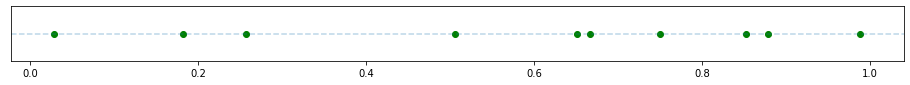

In [3]:
np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))

plt.figure(figsize=(16, 1))
plt.scatter(X, np.zeros(N), color='green')
plt.yticks([])
plt.ylim(-0.2, 0.2)
plt.axhline(y=0, alpha=0.3, ls='dashed')
plt.show()

The linear relation $Y = 1 + 0.5X$ indicates that the outcome $Y = (y_1, y_2, ..., y_n)$ should be:

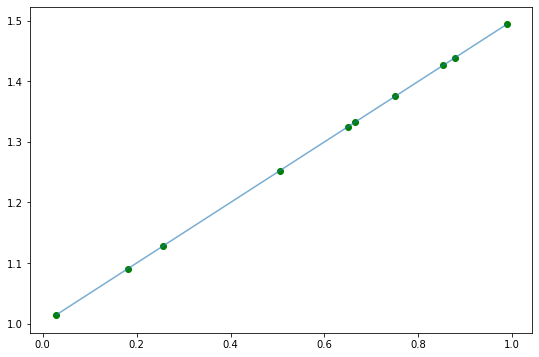

In [4]:
beta_0 = 1
beta_1 = 0.5
Y = beta_1*X + beta_0 

figure = plt.figure(figsize=(9, 6))
plt.plot(X, beta_1 * X + beta_0, figure=figure, alpha=0.6)
plt.scatter(X, Y, figure=figure, color='green')
plt.show()

Note that there is **NO** randomness involved. We say that $\beta_0 \text{ and } \beta_1$ are **constant**. Note that $\beta_0 \text{ and } \beta_1$ are in fact the **intercept** and the **slope** respectively.

<p><a name="error"></a></p>

### The Errors

All the randomness are attributed to $ \epsilon $. The relation $Y = 1 + 0.5X + \epsilon \text{ becomes: }$

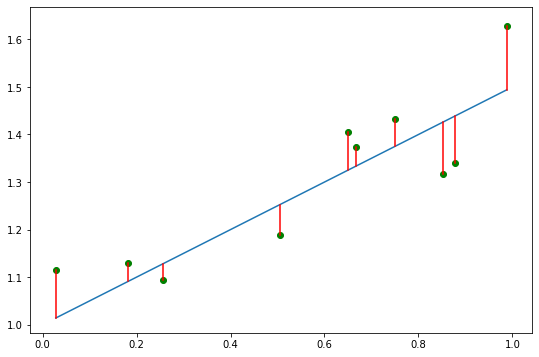

In [5]:
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1*X + error
figure = plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.plot(X, beta_0 + beta_1*X)
for i in range(N):
    plt.plot([X[i], X[i]], [beta_0+beta_1*X[i], Y[i]], color='red')
plt.show()

<p><a name="assumption"></a></p>

#### The Basic Assumptions on Linear Regression

The basic assumptions of a simple linear model are:

- Linearity
- Normality
- Constant Variance
- Independent Errors

<p><a name="linearity"></a></p>

#### Linearity

Linearity defines the relation between $X \text{ and } Y$. As we saw in the previous plot, it is represented by $\beta_0 \text{ and } \beta_1$.

We will discuss how these two constants are estimated.

<p><a name="on_error"></a></p>

#### Assumptions on the Errors

We cannot estimate $\epsilon$ mainly because it is random. However, we can still study some properties of the randomness. The last three assumptions (all but linearity) on linear model describe what kind of randomness $\epsilon$ should be.

**Normality**

Randomness are often described by **distribution**, which can be seen only when we have a lot of samples. So let's create a much larger sample set:

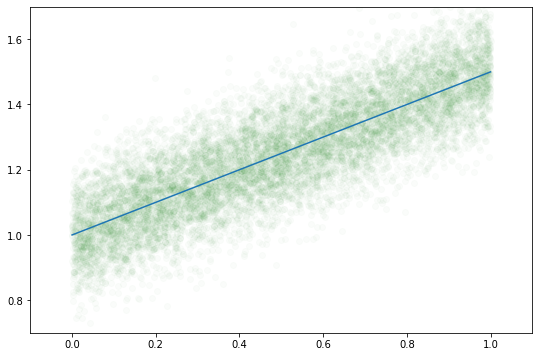

In [6]:
N = int(1e4)
np.random.seed(168)
X = np.random.rand(N)
X = np.array(sorted(X))
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1 * X + error

plt.figure(figsize=(9, 6))
plt.scatter(X, Y, alpha=0.02, color='green')
plt.plot(X, beta_0 + beta_1 * X)
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.show()

- And again we visualize the error with some of the $X$:

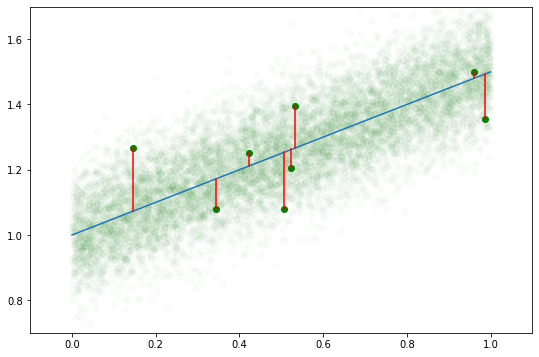

In [7]:
np.random.seed(1127)

plt.figure(figsize=(9, 6))
plt.scatter(X, Y, alpha=0.02, color='green')
plt.plot(X, beta_0 + beta_1 * X)
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)

example = np.random.choice(np.arange(N), size=8, replace=False)
for i in example:
    plt.scatter(X[i], Y[i], alpha=1, color='green')
    plt.plot([X[i], X[i]], [beta_0 + beta_1 * X[i], Y[i]], color='red')
plt.show()

- The normality assumption means if we sketch the histogram of the errors, it looks like:

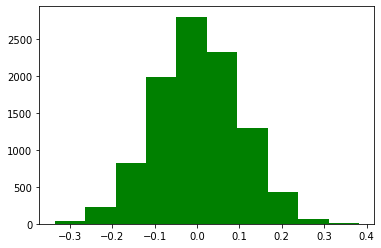

In [8]:
plt.hist(error, color='green', bins=10)
plt.show()

Note that the **mean** and the **standard deviation** of our errors are:

In [9]:
print('The mean of the errors is %.4f' %np.mean(error))
print('The standard deviation of the errors is %.4f' % np.std(error))

The mean of the errors is 0.0018
The standard deviation of the errors is 0.0995


**Constant Variance and Independent Errors**

The following two conditions:
- constant variance
- independent errors

indicate that the error of each observation is drawn independently from the same probability distribution. **Why?**



**How do we check that?**

- For a **single** observation, the relationship between the error and its distribution is weak. However, if all the errors obey the same distribution, we should obtain the same (or very similar) bell shape curve when we randomly choose a (large enough) subset from the observations.

For example, let's pick the observations from $X$ which are less than 0.5 and compare the normal distribution obtained from them with the one obtained from the full sample. You are invited to change the range of observations selected below and make the same comparison.

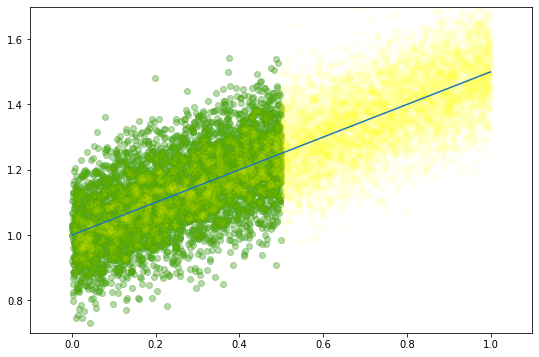

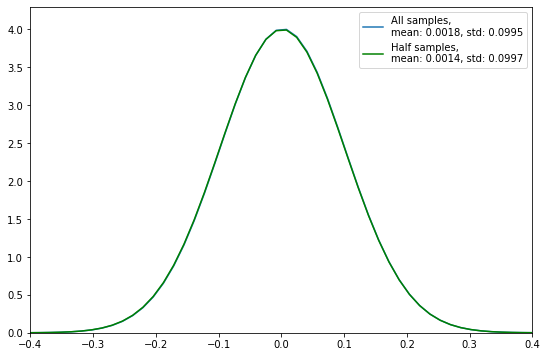

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

index = np.where(np.logical_and(X > 0, X < 0.5))
sub_X = X[index]
sub_Y = Y[index]

plt.figure(figsize=(9, 6))
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.scatter(sub_X, sub_Y, alpha=0.3, color='green')
plt.scatter(X, Y, alpha=0.05, color='yellow')
plt.plot(X, beta_0 + beta_1 * X)

sub_error = sub_Y - (beta_0 + beta_1 * sub_X)

plt.figure(figsize=(9, 6))
plt.xlim(-0.4, 0.4)
plt.ylim(0, 4.3)

my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)

my_norm = stats.norm(np.mean(sub_error), np.std(sub_error)).pdf
label = 'Half samples,\nmean: %.4f, std: %.4f' % (np.mean(sub_error), np.std(sub_error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), color='green', label=label)

plt.legend()
plt.show()

- We may also just randomly select the subset and make the same comparison. Again you are invited to change the amount of observations selected below.

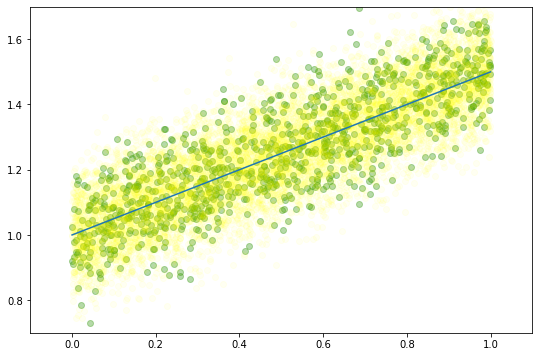

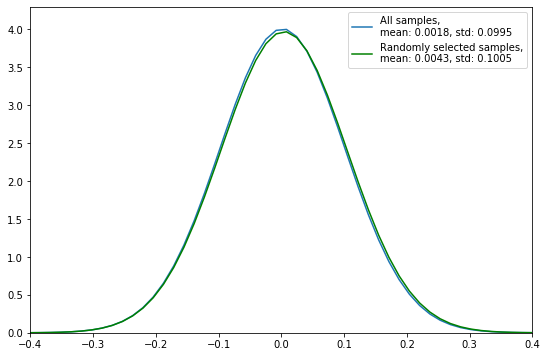

In [11]:
#### You may run the code below multiple times; each time we run it we are selecting different 
#### subset. You might also change the size of subset.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

size = 1000
index = np.random.choice(N, size, replace=False)
sub_X = X[index]
sub_Y = Y[index]
sub_error = sub_Y - (1 + 0.5 * sub_X)

sub_X = X[index]
sub_Y = Y[index]

plt.figure(figsize=(9, 6))
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.scatter(sub_X, sub_Y, alpha=0.3, color='green')
plt.scatter(X, Y, alpha=0.05, color='yellow')
plt.plot(X, beta_0 + beta_1 * X)

plt.figure(figsize=(9, 6))
plt.xlim(-0.4, 0.4)
plt.ylim(0, 4.3)

my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)

my_norm = stats.norm(np.mean(sub_error), np.std(sub_error)).pdf
label = 'Randomly selected samples,\nmean: %.4f, std: %.4f' % (np.mean(sub_error), np.std(sub_error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), color='green', label=label)

plt.legend()
plt.show()

<p><a name="estimate"></a></p>

### Estimating the Coefficients

In general, the optimal $\beta_0$ and $\beta_1$ are unknown a priori. What we are given is a set of observations $X \text{ and } Y$. Essentially what we do is to **try** all the possible pairs of $\beta_0 \text{ and } \beta_1$, and find the pair defining the linear model most "similar" to the observations.

- We again illustrate the process with visualization. For simplicity, we stick to 10 observations:

In [12]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
norm_error=scaler.fit_transform(error.reshape(-1,1))

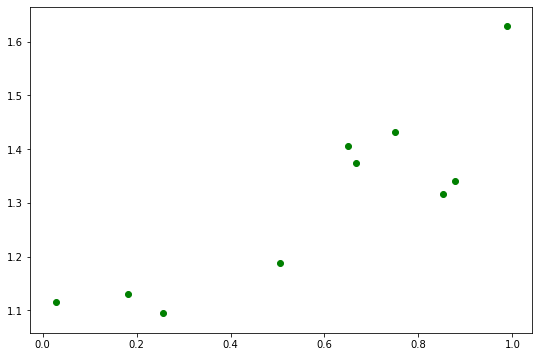

In [13]:
np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))

error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1 * X + error
plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.show()

<p><a name="residual"></a></p>

#### Residuals

- We then start trying out some pair of $( \tilde{\beta}_0, \tilde{\beta}_1) \text{ , say, } (0.5, 1)$.

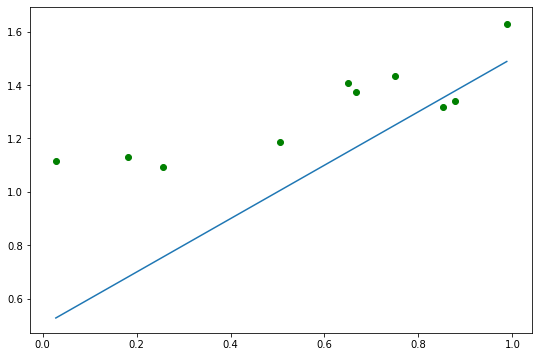

In [14]:
plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)
plt.show()

How different is the model from the observations?

- We may again consider the difference between the observation and the model:
$$
e = Y - (\tilde{\beta_0} + \tilde{\beta_1} X) 
$$

This difference vector is called the **residual**.

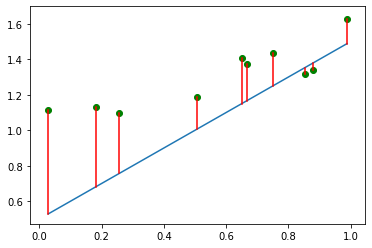

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)
for i in range(N):
    plt.plot([X[i], X[i]], [0.5+X[i], Y[i]], color='red')
plt.show()

To quantify the difference between the model and the observations, we use the **residual sum of squares**, or **RSS**. It is defined by:
$$
\text{ } \\
\text{Denote } e = (e_1, e_2, e_3, ..., e_n) \\
\text{ } \\
\begin{align*} 
RSS(\tilde{\beta_0}, \tilde{\beta_1})=& e_1^2 + e_2^2 + ... + e_n^2
\\ 
=&\sum_{i=1}^{n}(y_i-\tilde{\beta}_0-\tilde{\beta}_1x_i)^2
\end{align*}
$$

- Therefore RSS depends on ( $\tilde{\beta_0}$, $\tilde{\beta_1}$).
- Below we see that indeed the model with least RSS is most similar to the observations.

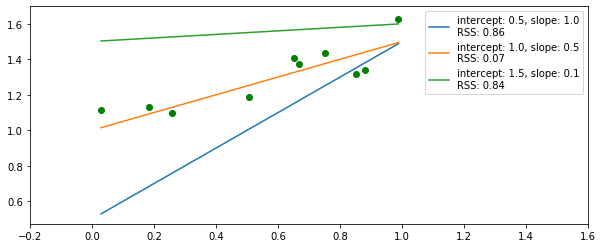

In [16]:
fig = plt.figure(figsize=(10, 4))
plt.scatter(X, Y, color='green')

plt.xlim(-0.2, 1.6)

for b0, b1 in [(0.5, 1), (1, 0.5), (1.5, 0.1)]:
    res = Y - (b0 + b1 * X)
    text = 'intercept: %.1f, slope: %.1f\nRSS: %.2f' %(b0, b1, np.sum(res**2))
    plt.plot(X, b0 + b1 * X, label=text)

plt.legend()
plt.show()

The coefficients that really minimize RSS are denoted by $(\hat{\beta_0}, \hat{\beta_1})$. And the linear model is denoted by:

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X$$

- The symbol $\hat{}$ denotes an estimated value. The coefficients $(\hat{\beta_0}, \hat{\beta_1})$ are called the **ordinary least square estimator**, (**OLS**). Once we have the estimators and a newly observed $X$, the corresponding $Y$ can be predicted by passing $X$ into the formula above.

<p><a name="formula"></a></p>

#### The Formula of the Coefficients -- The Normal Equation

- Minimizing the RSS characterizes the coefficients $(\hat{\beta_0}, \hat{\beta_1})$ uniquely. We will not discuss how to derive them, it is actually the standard optimization problem by differentiation. $(\hat{\beta_0}, \hat{\beta_1})$ actually admits a closed form:

$$
\begin{align}
\text{ }\\
\hat{\beta}_1&=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}
\\
\hat{\beta}_0&=\bar{y}-\hat{\beta}_1\bar{x}\\
\text{ }\\
\text{wh}&\text{ere } \bar{y} \text{ and } \bar{x} \text{ are the sample means of } x_i \text{ and } y_i, \text{ respectively.} 
\end{align}
$$

- Of course, if you don't care about math, scikit-learn will find the coefficients for us.

<p><a name="rsquare"></a></p>

### Evaluating the Model: Coefficient of Determination

- Once we fit a linear model, how should we assess the overall accuracy of the model?

- The usual way to measure the overall accuracy of a simple linear model is to use the **coefficient of determination**.

- The coefficient of determination, denoted $R^2$, measures how well a model fits the data.

- $R^2$ is defined as
$$R^2=1-\frac{RSS}{TSS}$$
  where TSS is the total sum of squares:
$$TSS=\sum_{i=1}^{n}(y_i-\bar{y})^2$$

- RSS (The total area of the blue squares) represents the squared residuals with respect to the linear regression. 

- TSS (The total area of the red squares) represents the squared residuals with respect to the average value and is fixed if data is known. (Can you tell why?)

- Therefore the coefficient of determination is a number $\in [0,1]$ that gauges the proportion of the variance in the dependent variable that is predictable from the independent variable.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg" style="width: 500px;">

*Source: https://en.wikipedia.org/wiki/Coefficient_of_determination. The areas of the red squares represent TSS. The areas of the blue squares represent RSS.*

- Given a dataset, TSS is model independent, the fitted model has the minimum RSS among all linear models:

  - $R^2 = 1$ indicates that the regression line fits the data perfectly (no error).
  
  - $R^2 = 0$ indicates that the line fits the data not better than the null model (horizontal $y=\bar{y})$.
  
  - In general, the better the linear regression fits the data in comparison to the sample average, the closer the value of $R^2$ is to 1.

<p><a name="reg_sklearn"></a></p>

### Linear Regression in Scikit-Learn

In [17]:
#### In case you change the variables, let create them again:
#### Loading the packages to be used
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats

beta_0 = 1
beta_1 = 0.5

np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1 * X + error

- To fit a linear model with scikit-learn, first we need to import **`linear_model`** from **`sklearn`**. 

- Then we create a **`LinearRegression`** instance, which uses the **`OLS`** method to fit a linear model.

In [18]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

# Also valid Python syntax:
# from sklearn.linear_model import LinearRegression
# ols = LinearRegression()

Some attributes and methods we will use for linear regression:

- `coef_`: Estimated coefficients ($\hat{\beta}_1$,...) for the linear regression problem.
- `intercept_`: Independent term ($\hat{\beta}_0$) in the linear model.
- `fit(X, y)`: Fit linear model.
- `predict(X)`: Predict using the linear model
- `score(X, y)`: Returns the coefficient of determination $R^2$ of the prediction.


In [18]:
# Attributes and methods may differ in different versions of scikit-learn.
# You can find the current version's by adding a question mark after any variable, class or function
# This is known as an iPython "magic" command
ols?

**Fitting**

Next we fit a simple linear model with the data set.

- Once we fit the model, the coefficients can be accessed via `coef_` and `intercept_` attributes.

In [19]:
ols.fit(X.reshape(-1,1), Y)   #### What happen if we remove the 'reshape' method? 
print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.3f" %ols.intercept_)

beta_1: 0.457
beta_0: 1.040


**Predicting**

- To make prediction with the fitted model, we simply pass a **column vector** to `predict()`.

[1.05251398 1.12263584 1.15694823 1.27043576 1.33662371 1.3438067
 1.38218682 1.42881625 1.44085917 1.49077568]


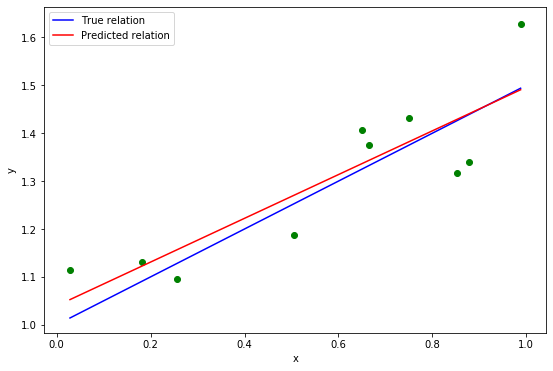

In [20]:
#### For convenience, let's update X
X = X.reshape(-1,1)
print(ols.predict(X))

plt.figure(figsize=(9, 6))
plt.plot(X, beta_0 + beta_1*X, c='b', lw=1.5, label='True relation')
plt.plot(X, ols.predict(X), c='r', lw=1.5, label='Predicted relation')
plt.scatter(X, Y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

In [21]:
#### predict: prediction
print("RSS: %.2f" % np.sum((Y - ols.predict(X)) ** 2))
#ols.residues_  # will be deprecated in version 0.19
## score: the R^2 of the fitted model
print('R^2: %.2f' % ols.score(X, Y))

RSS: 0.06
R^2: 0.75


- The RSS is 0.06, which is better than passing any other pair into the function $RSS$.

- The $R^2$ is 75%, which means that 75% of the variance of Y can be explained by variable X.

<p><a name="multi_reg"></a></p>

## Multiple Linear Regression - Model

- In reality, the output Y often depends on multiple input variables. Suppose that we would like to study the dependence of *Income* on both *Years of Education* and *Seniority*. Since there are two independent variables, the linear model can no longer be represented by a line -- but a **plane** in 3D:

<img src="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/MultipleLinearRegression-Plane.png" style="height: 300px;">

*Source: James et al. Introduction to Statistical Learning (Springer 2013)*

- In general, if the output $Y$ depends on more than one input variable, say $X_1$, $X_2$, ... $X_p$, then we need to generalize our linear model as

$$\hat{Y}=\hat{\beta}_0+\sum_{i=1}^p\hat{\beta}_iX_i$$

- It is very common that we include the constant 1 in $X$ and use the notation

$$\hat{\beta}=(\hat{\beta_0}, \hat{\beta_1}, ... ,\hat{\beta_p})^T$$
$$X=(1, X_1, ..., X_p)$$

- Note that $X \text{ now becomes a } N\times (p+1)$ matrix. Then we can write the model in a matrix notation:

$$\hat{Y}=X\hat{\beta},$$

with $\hat{\beta}$ being a $(p+1)\times 1$ matrix (i.e. a vector).

<p><a name="matrix"></a></p>

#### Least Square in Matrix Notation

The matrix notation is convenient for estimating:

- **residual**: In matrix notation, the RSS can be written as the following:

$$RSS(\beta)=(Y-X\beta)^T(Y- X\beta)$$

- **fitting**: Again differentiating RSS with respect to $\beta$ and setting the result to zero (why?), we get the so-called 'normal equation':

$$\hat{\beta}=(X^TX)^{-1}X^T Y$$

- **Note**: when two or more input variables are highly correlated with each other, then $X^T X$ is close to be singular (i.e. $det(X^TX)\sim 0$) and the solution $\hat{\beta}$ will be numerically unstable - any tiny fluctuations of data will cause huge changes of the model.

### Multiple Linear Regression in Scikit-Learn
We create a random data set of two independent variables using the model:

$$Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$$

In [22]:
np.random.seed(1)
N = 30
## generate a random array with 2 columns
beta = np.array([2, -7, 5])
x_m = np.random.randn(N, 2)
y_m = np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4

Let’s visualize the data set in both 2D and 3D: 

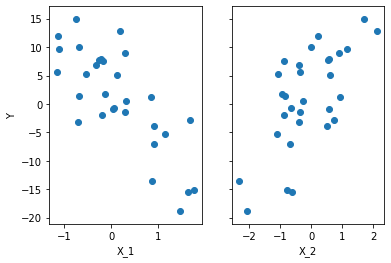

In [23]:
## use subplots to make two scatter plots side by side
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x_m[:,0], y_m)
ax2.scatter(x_m[:,1], y_m)
ax1.set_xlabel('X_1')
ax1.set_ylabel('Y')
ax2.set_xlabel('X_2')
plt.show()

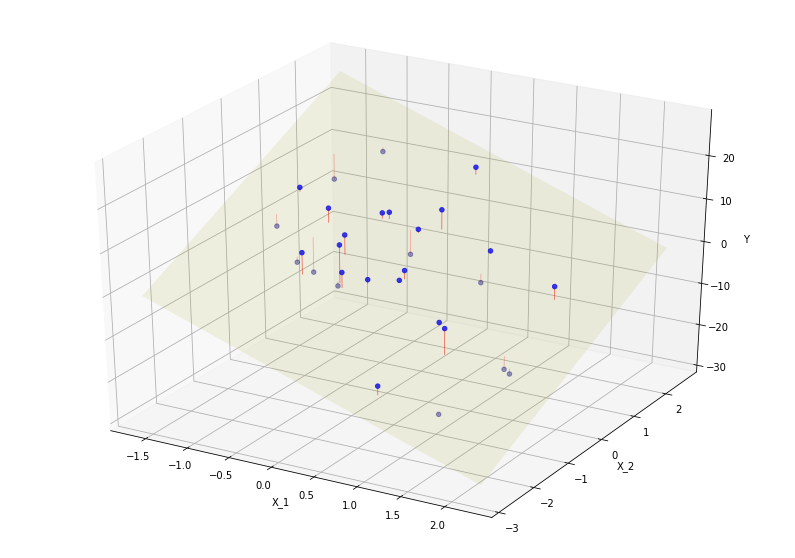

In [24]:
## 3D scatter plot

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
# plot the data points
X = np.array(list(map(lambda x: [1] + list(x), x_m)))  # Idiomatic Py3, but inefficient on Py2
up = np.where(y_m >= np.sum(X*beta, axis=1))[0]
down = np.where(y_m < np.sum(X*beta, axis=1))[0]
ax.scatter(x_m[up, 0], x_m[up, 1], y_m[up], c='blue', alpha=.8)
ax.scatter(x_m[down, 0], x_m[down, 1], y_m[down], c='Darkblue', alpha=.4)

# plot the error bars
ax = fig.gca(projection='3d')
x_up = x_m[up,:]; y_up = y_m[up]
up_kwargs = dict(color='red', alpha=.6, lw=0.8)
for i, j, k in zip(x_up[:, 0], x_up[:, 1], y_up):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **up_kwargs)
    
x_down = x_m[down,:]; y_down = y_m[down]
down_kwargs = dict(color='red', alpha=.3, lw=0.8)
for i, j, k in zip(x_down[:,0], x_down[:,1], y_down):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **down_kwargs)
    
    
# plot the plane which represents the true model
x_1 = np.linspace(min(x_m[:, 0])-.5, max(x_m[:, 0])+.5, 25)
x_2 = np.linspace(min(x_m[:, 1])-.5, max(x_m[:, 1])+.5, 25)
x_1, x_2 = np.meshgrid(x_1, x_2)
x_3 = beta[1]*x_1 + beta[2]*x_2 + beta[0]
surface_kwargs = dict(rstride=100, cstride=100, color='yellow', alpha=0.1)
ax.plot_surface(x_1, x_2, x_3, **surface_kwargs)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
plt.show()

**Fitting and Evaluating Multiple Linear Regression**

If the first variable `x` that we pass into `fit()` contains multiple columns, then a multiple linear model is returned. This is why the model needs to take in a 2D array as its X--to check whether the quesiton is a multi-linear regression one.

In [25]:
ols.fit(x_m, y_m)
print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [-6.619  4.436]
beta_0: 2.523
RSS: 356.34
R^2: 0.83938


- By comparing with the true model $Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$, we can see the estimated coefficients are close to the true values.

**Regression in terms of the Matrix Formula**

Let's calculate the coefficients by using the normal equation we just derived:
$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [26]:
import numpy as np
## transform x to a matrix
x_m = np.mat(x_m)
## y transpose converts y into a column vector
y_m = np.mat(y_m).T
## add a column of 1’s to x
x_m = np.column_stack((np.ones([x_m.shape[0], 1]), x_m))
## matrix.I returns the inverse of that matrix
(x_m.T*x_m).I * x_m.T * y_m

matrix([[ 2.52343727],
        [-6.6191147 ],
        [ 4.43620544]])

As you can see, we get exactly the same coefficients as we get from sciki-learn.

In [26]:
import pandas as pd

In [28]:
df = pd.read_csv('./Housing_scaled_01.csv')
df.head(5)

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,-122.23,37.88,32.672294,8.208606,5.645033,7.675271,5.705034,2.728723,61.003713,3.113149,-2.957260,0.876915,0,0,0,1,0
1,1,-122.22,37.86,17.070476,11.413717,8.717972,11.487953,8.974699,2.724071,58.036799,2.848110,-2.822167,0.707407,0,0,0,1,0
2,8,-122.26,37.84,33.434943,9.799169,7.954136,10.099133,7.961036,0.797670,52.585885,2.062241,-1.811675,0.671329,0,0,0,1,0
3,15,-122.26,37.85,39.491212,8.560402,6.722807,9.055987,6.750997,0.822822,47.360433,2.038908,-1.864239,0.905250,0,0,0,1,0
4,18,-122.26,37.84,39.491212,9.597088,7.399371,9.717414,7.430798,0.746034,48.672270,2.506253,-2.271723,0.808116,0,0,0,1,0


In [33]:
df.iloc[:,3:13].corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
housing_median_age,1.000000,-0.370501,-0.303001,-0.265266,-0.290864,-0.176350,0.030739,-0.246830,0.183157,0.043990
total_rooms,-0.370501,1.000000,0.915144,0.832137,0.924837,0.258894,0.193359,0.295167,-0.242003,-0.162391
total_bedrooms,-0.303001,0.915144,1.000000,0.878431,0.980523,-0.028673,0.080626,-0.064623,0.152615,-0.184196
population,-0.265266,0.832137,0.878431,1.000000,0.904265,-0.013094,-0.013359,-0.092092,0.089180,0.268293
households,-0.290864,0.924837,0.980523,0.904265,1.000000,0.015067,0.104957,-0.089738,0.108605,-0.168152
median_income,-0.176350,0.258894,-0.028673,-0.013094,0.015067,1.000000,0.677140,0.643659,-0.730392,-0.059443
median_house_value,0.030739,0.193359,0.080626,-0.013359,0.104957,0.677140,1.000000,0.252692,-0.297483,-0.268059
rooms_per_household,-0.246830,0.295167,-0.064623,-0.092092,-0.089738,0.643659,0.252692,1.000000,-0.903241,-0.003351
bedrooms_per_room,0.183157,-0.242003,0.152615,0.089180,0.108605,-0.730392,-0.297483,-0.903241,1.000000,-0.046822
population_per_household,0.043990,-0.162391,-0.184196,0.268293,-0.168152,-0.059443,-0.268059,-0.003351,-0.046822,1.000000


In [74]:
Y = df['median_house_value']
features = list(set(df.columns.tolist()[3:])-set(['median_house_value']))
print(features)
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

['bedrooms_per_room', '<1H OCEAN', 'population', 'INLAND', 'total_bedrooms', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND', 'households', 'total_rooms', 'rooms_per_household', 'median_income', 'housing_median_age', 'population_per_household']


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [79]:
def lr_model(xT,xt,yT,yt,features):
    """"
    xT: Original Train X, yT: Original Train Y
    xt: Original Test X, yt: Original Test Y
    features: features in train dataset
    """
    XT,Xt = xT[features], xt[features]
    lr = LinearRegression()                     #Make a model
    lr.fit(XT,yT)                               #Fit a train data
    y_train_pred = lr.predict(XT)               #Predict the train data
    rmse = mean_squared_error(yT,y_train_pred)  #Calculate root-mean-squared-error
    mae = mean_absolute_error(yT,y_train_pred)  #Calculate mean-absolute-error
    rsq = r2_score(yT,y_train_pred)             #Calculate R^2
    print(f'train: rmse={rmse}, mae={mae}, R^2={rsq}')
    y_test_pred = lr.predict(Xt)                #Predict the test data
    rmse = mean_squared_error(yt,y_test_pred)
    mae = mean_absolute_error(yt,y_test_pred)
    rsq = r2_score(yt,y_test_pred)             #Calculate R^2
    print(f'train: rmse={rmse}, mae={mae}, R^2={rsq}')
    train_res = yT - y_train_pred               #Calcualte residuals
    test_res = yt - y_test_pred
    plt.scatter(yT,train_res,alpha=0.4,label='train') #Plot residuals
    plt.scatter(yt,test_res,alpha=0.4, label='test')
    plt.hlines(y=0,xmin=yT.min()-2,xmax=yT.max()+2,linestyles='--',color='r')
    plt.legend()
    plt.show()
    return lr

train: rmse=8.206180522556119, mae=2.2169320667615215, R^2=0.7106131410345096
train: rmse=7.960813891167741, mae=2.1907446196748688, R^2=0.7251373701845317


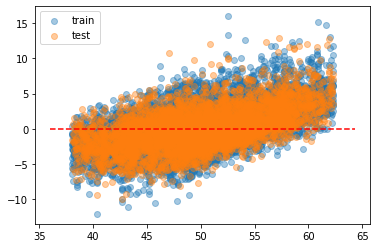

In [81]:
lr_all = lr_model(X_train,X_test,y_train,y_test,features)

In [86]:
pd.DataFrame({'features':features,'weight':lr_all.coef_}).sort_values('weight')

,features,weight
9,total_rooms,-26.731592
13,population_per_household,-19.814847
3,INLAND,-5.188291
5,NEAR BAY,-1.619131
1,<1H OCEAN,-0.800810
6,NEAR OCEAN,-0.226635
12,housing_median_age,0.054975
4,total_bedrooms,0.411882
0,bedrooms_per_room,1.481176
2,population,6.031911


In [94]:
original_features = ['population', 'total_bedrooms', 'households', 'total_rooms','housing_median_age','median_income','<1H OCEAN', 'population', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']

train: rmse=8.491660401389671, mae=2.2652396840264313, R^2=0.7005458356411648
train: rmse=8.354702533918768, mae=2.2564080045826467, R^2=0.7115375963823695


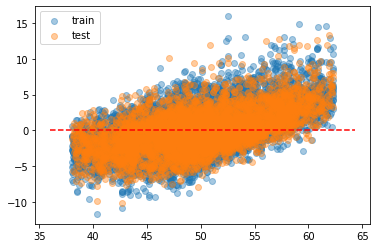

In [95]:
lr_orginal = lr_model(X_train,X_test,y_train,y_test,original_features)

train: rmse=8.547629583852357, mae=2.2610559882036503, R^2=0.6985721103657796
train: rmse=8.324502107296473, mae=2.2414503816061435, R^2=0.71258032502751


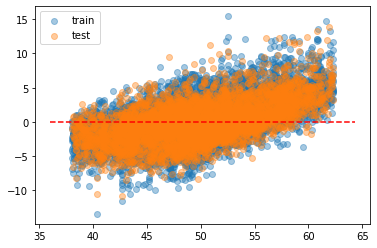

In [99]:
new_features = ['population_per_household','bedrooms_per_room','rooms_per_household','median_income','households',
'<1H OCEAN', 'population', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']
lr_new = lr_model(X_train,X_test,y_train,y_test,new_features)

<p><a name="MLE"></a></p>

# Maximum Likelihood Estimation & Gradient Descent

Recall, the linear regression model
$$ y(\vec{x},\vec{\beta})=\beta_0+\sum_{i=1}^D\beta_i x_i.$$
- Assume we have a vector with $D$ features, $\vec{x}=(x_1,\dots,x_D)^T$,
- weights (coefficients) $\vec{\beta}=(\beta_0,\dots,\beta_D)$,
- and the model $y(\vec{x},\vec{\beta})$ predicts the target variable $t$:
$$t = y(\vec{x},\vec{\beta})+\epsilon$$
where $\epsilon$ is a noise that has zero mean Gaussian random variable, $\mathcal{N}(0,\sigma^2)$

In a case of non-linear $\vec{x}$, we can extend the $y(\vec{x},\vec{\beta})$ using the basis function $\phi(\vec{x})$ but our model is still in linear, 
$$ y(\vec{x},\vec{\beta})=\beta_0+\sum_{j=1}^{M-1}\beta_j\phi_j(\vec{x}).$$

If we let $\phi_0(\vec{x})=1$, then $y(\vec{x},\vec{\beta})$ can be simplified as 
$$ y(\vec{x},\vec{\beta})=\sum_{j=0}^{M-1}\beta_j\phi_j(\vec{x})=\vec{\beta}^T\vec{\phi}(\vec{x}).$$

<p><a name="gaussian"></a></p>

## Gaussian Distribution
Recall the Gaussian Distribution, 
$$\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\Big(-\frac{1}{2\sigma^2}(x-\mu)^2\Big).$$

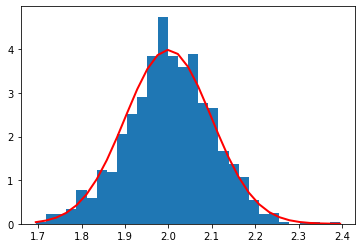

In [38]:
mu, sigma = 2, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

The probability is 
$$p(x|\mu,\sigma^2)=\prod_{n=1}^N\mathcal{N}(x|\mu,\sigma^2)=\prod_{n=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\exp\Big(-\frac{1}{2\sigma^2}(x-\mu)^2\Big).$$
How can we find $\mu$ and $\sigma^2$? We can do by minimizing the ln-likelihood function.
- by using ln-function, we can make the product to the linear combination as $\ln(ab)=\ln(a)+\ln(b)$.
- to find the local/global minimum, we can set the derivative of any function to 0.
    - when we have multi-variables, we set a gradient, $\vec{\nabla}$ to 0. 
$$\begin{split}\ln(p(x|\mu,\sigma^2) & =\ln\Big(\prod_{n=1}^N\mathcal{N}(x|\mu,\sigma^2)\Big)\\
& = -\frac{1}{2\sigma^2}\sum_{n=1}^N(x_n-\mu)^2-\frac{N}{2}\ln(\sigma^2)-\frac{N}{2}\ln(2\pi)\end{split}$$
After we take the ln of the probability to transform into a linear combination, we take the gradient (partial derivative of a function respect to each variable) to be 0:
$$ \nabla(p)=0$$
$$\begin{split}
\nabla_{\mu}(p) = 0 & = \frac{\partial}{\partial \mu}\Big(-\frac{1}{2\sigma^2}\sum_{n=1}^N(x_n-\mu)^2-\frac{N}{2}\ln(\sigma^2)-\frac{N}{2}\ln(2\pi)\Big)\\
& =-\frac{1}{2\sigma^2}\sum_{n=1}^N2(x_n-\mu)(-1)=\frac{1}{\sigma^2}\sum_{n=1}^N(x_n-\mu)\\
& = \sum_{n=1}^Nx_n - \sum_{n=1}^N\mu
\end{split}$$
Since $\sum_{n=1}^N\mu=N\mu$,
$$0= \sum_{n=1}^Nx_n - \sum_{n=1}^N\mu\to N\mu= \sum_{n=1}^Nx_n\to\mu=\frac{1}{N}\sum_{n=1}^Nx_n$$

- We can do similar to find $\sigma^2$,
$$\sigma^2 = \frac{1}{N}\sum_{n=1}^N(x_n-\mu)^2$$

Let's apply the log-MLE to linear regression model. 
- using the same model above, the target $t$ has a probability 
$$\begin{split}p(\vec{t}|\vec{x},\vec{\beta},\sigma^{-2})&=\prod_{n=1}^N\mathcal{N}\Big(t_n|\vec{\beta}^T\vec{\phi}(\vec{x}_n),\sigma^{2}\Big)\\
\ln(p(\vec{t}|\vec{x},\vec{\beta},\sigma^{-2})) & = -\frac{1}{2\sigma^2}\sum_{n=1}^N\Big(t_n-\vec{\beta}^T\vec{\phi}(\vec{x}_n)\Big)^2+\frac{N}{2}\ln(\sigma^2)-\frac{N}{2}\ln(2\pi)\end{split}$$
- to find the optmized $\vec{\beta}^T$, make the equation above as $\nabla_{\vec{\beta}^T}=0$.
$$\begin{split}\nabla_{\vec{\beta}^T}& =0\\
0 & = -\frac{1}{\sigma^2}\sum_{n=1}^N\Big(t_n-\vec{\beta}^T\vec{\phi}(\vec{x}_n)\Big)\end{split}$$
- if we solve for $\vec{\beta}^T$, we find that 
    $$\sum_{n=1}^N\vec{\beta}^T\vec{\phi}(\vec{x}_n)=\sum_{n=1}^Nt_n$$
    $$\begin{split}\sum_{n=1}^N\vec{\beta}^T\vec{\phi}(\vec{x}_n)^{T}\vec{\phi}(\vec{x}_n) & = \vec{\phi}(\vec{x}_n)^T\sum_{n=1}^Nt_n\\
    \vec{\beta}^T & = \sum_{n=1}^N\Big(\vec{\phi}(\vec{x}_n)^{T}\vec{\phi}(\vec{x}_n)\Big)^{-1}\vec{\phi}(\vec{x}_n)^Tt_n\end{split}$$
- in a closed form, it is the solution from OLS, $$\beta=(XX^T)^{-1}X^TY.$$

<p><a name="gradient"></a></p>

## Optimization: Gradient Descent
- Then, our next question is how a machine learns for the optimal solution. We can use the gradient descent.
    - Gradient descent is a optimization technique by continuously updating the weights interatively using the prodcut of a constant called the learning rate $\eta$ and the train loss function (we also call it the cost function).
    - In Linear Regression, the train loss function is the square loss function $\frac{1}{N}\sum(t-y)^2$.
    - for the derivation, let's start from the simple assumptions:
        - target: $t=(t_1,\dots,t_n)$, inputs: $x=(x_1,\dots,x_n)$, model $y=\sum_{i=1}^nx_i^T\beta_i$
        - starting from the log-MLE set-up, we find that

        $$\begin{split} \vec{\beta} & = \operatorname*{argmax}_{\vec{\beta}} \prod_{i=1}^n p(t_i|x_i,\beta)\\
        & = \operatorname*{argmax}_{\vec{\beta}} \sum_{i=1}^n \ln{p(t_i,|x_i,\beta)}\\
        & = \operatorname*{argmax}_{\vec{\beta}} \text{Constant}+\sum_{i=1}^n\ln\Big(\exp\Big(-\frac{(x_i^T\beta-t_i)^2}{2\sigma^2}\Big)\Big)\\
        & = \operatorname*{argmin}_{\vec{\beta}}\sum_{i=1}^n \frac{(x_i^T\beta-t_i)^2}{2\sigma^2}\end{split}$$
        
        - By taking an average $$\vec{\beta} = \operatorname*{argmin}_{\vec{\beta}} \sum_{i=1}^n \frac{(x_i^T\beta-t_i)^2}{N}$$
        
        - PSUEDOCODE
            1. Predict $y$
            2. Find the gradiden loss mean: $\nabla Loss=\frac{1}{N}\sum\nabla (t-\beta X)(-X)$
            3. Update weight: $\beta\leftarrow\beta-\eta\nabla Loss$
            4. Repeat step 1-3 until loss mean becomes $\frac{1}{N}\sum(t-y)^2\approx 0$. 

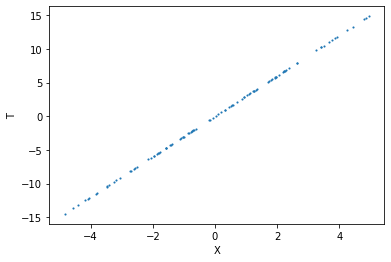

In [100]:
np.random.seed(123)
X = 10*np.random.sample(100)-5
T = 3*X
plt.scatter(X,T,s=1.2)
plt.ylabel('T')
plt.xlabel('X')
plt.show()

eta=0.001,beta=[2.0120427634766513, 2.023940498801148, 2.035694952513224, 2.0473078501194486]
eta=0.01,beta=[2.162038312390189, 2.2629520564539956, 2.3517129970047645, 2.429784667425353]
eta=0.1,beta=[3.116481505521015, 2.9762055834816294, 3.004860636501196, 2.999007086928208]
eta=0.5,beta=[3.0049857955664416, 2.9749644171916443, 3.1257132183222187, 2.3687459412506553]


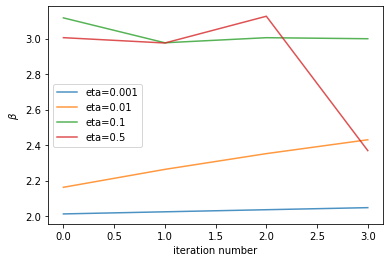

In [147]:
beta = 2
learning_rate = [1E-3, 1E-2, 0.1, 5E-1]
beta_list = []
for eta in learning_rate:
    beta_temp = []
    for i in range(4):
        Y = beta*X
        grad_loss = np.mean(2*(T-beta*X)*-X)
        beta = beta - eta*grad_loss
        beta_temp.append(beta)
    beta_list.append(beta_temp)
    
for i,eta in zip(range(0,4),learning_rate):
    print(f'eta={eta},beta={beta_list[i]}')
    plt.plot(range(0,4),beta_list[i],alpha=0.8,label=f'eta={eta}')
plt.xlabel('iteration number')
plt.legend()
plt.ylabel(r'$\beta$')
plt.show()

In [41]:
import pandas as pd
beta = 2.5
eta = 0.03
eta_list, beta_list, loss_list = [], [], []
for i in range(10):
    Y = beta*X
    grad_loss = np.mean(2*(T-beta*X)*-X)
    new_loss = np.mean((T-beta*X)**2)
    eta = eta + 0.05
    beta = beta - eta*grad_loss
    
    beta_list.append(beta)
    eta_list.append(eta)
    loss_list.append(new_loss)
pd.DataFrame({'beta':beta_list,'learning rate':eta_list,'mean_loss':loss_list})

,beta,learning rate,mean_loss
0,2.981711,0.08,1.505345
1,3.010344,0.13,0.002014
2,2.987922,0.18,0.000644
3,3.021377,0.23,0.000878
4,2.949295,0.28,0.002752
5,3.150803,0.33,0.015481
6,2.460691,0.38,0.136935
7,5.253441,0.43,1.751342
8,-7.772633,0.48,30.576547
9,60.985471,0.53,698.779088


<p><a name="overfit"></a></p>

# Overfit vs. Underfit

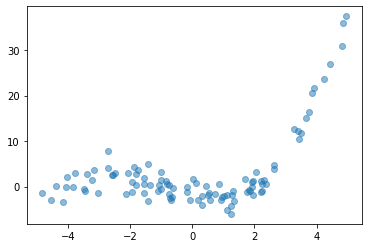

In [42]:
np.random.seed(123)
X = 10*np.random.sample(100)-5
X = np.array(sorted(X))
error = np.random.normal(0, 1, 100)
Y = 0.25*X**3+ 0.75*X**2 -1.5*X -2+error*2
plt.scatter(X,Y,alpha=0.5)
plt.show()

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

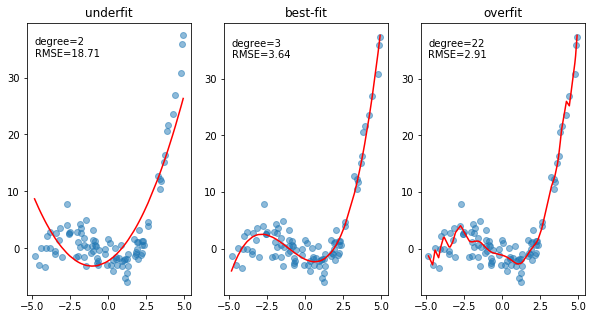

In [44]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
for ax, degrees in zip([ax1,ax2,ax3],[2,3,22]):
    poly = PolynomialFeatures(degree=degrees, include_bias=False)
    poly_features = poly.fit_transform(X.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, Y)
    y_predicted = poly_reg_model.predict(poly_features)
    RMSE=mean_squared_error(Y,y_predicted)
    ax.scatter(X,Y,alpha=0.5)
    ax.plot(X,y_predicted,c='red')
    ax.text(np.min(X),np.max(Y)*0.9,'degree='+str(degrees)+'\n'+'RMSE='+str(round(RMSE,2)),ha='left')
ax1.set_title('underfit')
ax2.set_title('best-fit')
ax3.set_title('overfit')
plt.show()

In [148]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [217]:
np.random.seed(123)
X = 10*np.random.sample(100)-5
X1 = np.array(sorted(X))
X2 = X**2
X3 = X**3
X4 = X**3/2
X = np.column_stack((X1,X2,X3,X4))

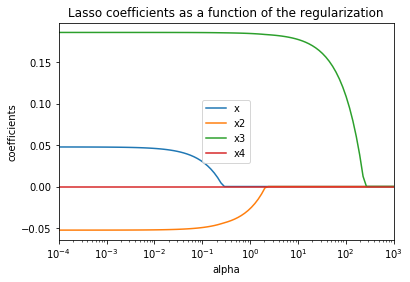

In [197]:
alphas_lasso = np.logspace(-4, 3, 100)
coef_lasso = []
lasso = Lasso()
rmse, mae, rsq = [], [], []
for i in alphas_lasso:
    lasso.set_params(alpha = i).fit(X,Y)
    coef_lasso.append(lasso.coef_)
    y_train_pred = lasso.predict(X)

    rmse.append(mean_squared_error(Y,y_train_pred))  #Calculate root-mean-squared-error
    mae.append(mean_absolute_error(Y,y_train_pred))  #Calculate mean-absolute-error
    rsq.append(r2_score(Y,y_train_pred))             #Calculate R^2
    
features = ['x','x2','x3','x4']
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=features)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

100


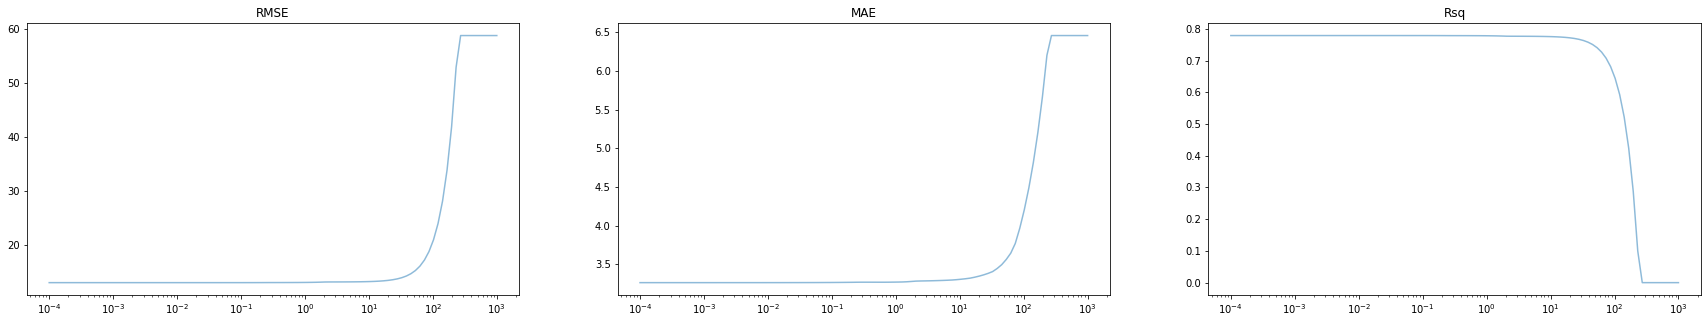

In [187]:
print(len(rmse))
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,5))
for ax,y in zip([ax1,ax2,ax3],[rmse,mae,rsq]):
    ax.plot(alphas_lasso,y,alpha=0.5)
    ax.set_xscale('log')
ax1.set_title('RMSE')
ax2.set_title('MAE')
ax3.set_title('Rsq')
plt.show()

In [210]:
alphas = np.logspace(-2, 3, 5)
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X,Y)
    print(f'Lasso, alpha={round(alpha,5)}, intercept={round(lasso.intercept_,2)}, coefficients={lasso.coef_}, rmse={mean_squared_error(Y,lasso.predict(X))}')
lr = LinearRegression()
lr.fit(X,Y)
print(f'Linear Regression, intercept={round(lr.intercept_,2)}, coefficients={lr.coef_}, rmse={mean_squared_error(Y,lr.predict(X))}')

Lasso, alpha=0.01, intercept=0.24, coefficients=[ 0.04591006 -0.05221259  0.18560946  0.        ], rmse=13.006343902736498
Lasso, alpha=0.17783, intercept=0.21, coefficients=[ 0.01648733 -0.04703605  0.18533752  0.        ], rmse=13.012893764555317
Lasso, alpha=3.16228, intercept=-0.08, coefficients=[ 0.         -0.          0.18232391  0.        ], rmse=13.136403351426349
Lasso, alpha=56.23413, intercept=-0.05, coefficients=[ 0.         -0.          0.14271235  0.        ], rmse=15.48918780840939
Lasso, alpha=1000.0, intercept=0.04, coefficients=[-0.  0.  0.  0.], rmse=58.82740534381207
Linear Regression, intercept=0.24, coefficients=[ 0.04766321 -0.05252104  0.14850053  0.07425027], rmse=13.006323124645764


In [213]:
np.random.seed(123)
X = 10*np.random.sample(100)-5
X1 = np.array(sorted(X))
X2 = X**2
X3 = X**3
Xorig = np.column_stack((X1,X2,X3))

In [215]:
lr = LinearRegression()
lr.fit(Xorig,Y)
print(f'Linear Regression, intercept={round(lr.intercept_,2)}, coefficients={lr.coef_}, rmse={mean_squared_error(Y,lr.predict(Xorig))}')


Linear Regression, intercept=0.24, coefficients=[ 0.04766321 -0.05252104  0.18562567], rmse=13.006323124645764


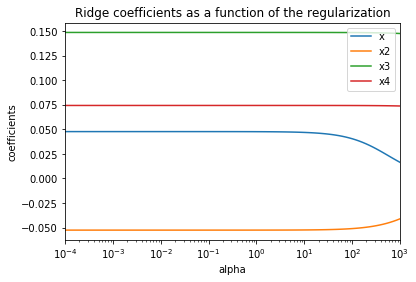

In [219]:
alphas_ridge = np.logspace(-4, 3, 100)
coef_ridge = []
ridge = Ridge()
rmse, mae, rsq = [], [], []
for i in alphas_lasso:
    ridge.set_params(alpha = i).fit(X,Y)
    coef_ridge.append(ridge.coef_)
    y_train_pred = ridge.predict(X)

    rmse.append(mean_squared_error(Y,y_train_pred))  #Calculate root-mean-squared-error
    mae.append(mean_absolute_error(Y,y_train_pred))  #Calculate mean-absolute-error
    rsq.append(r2_score(Y,y_train_pred))             #Calculate R^2
    
features = ['x','x2','x3','x4']
df_coef = pd.DataFrame(coef_ridge, index=alphas_ridge, columns=features)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

100


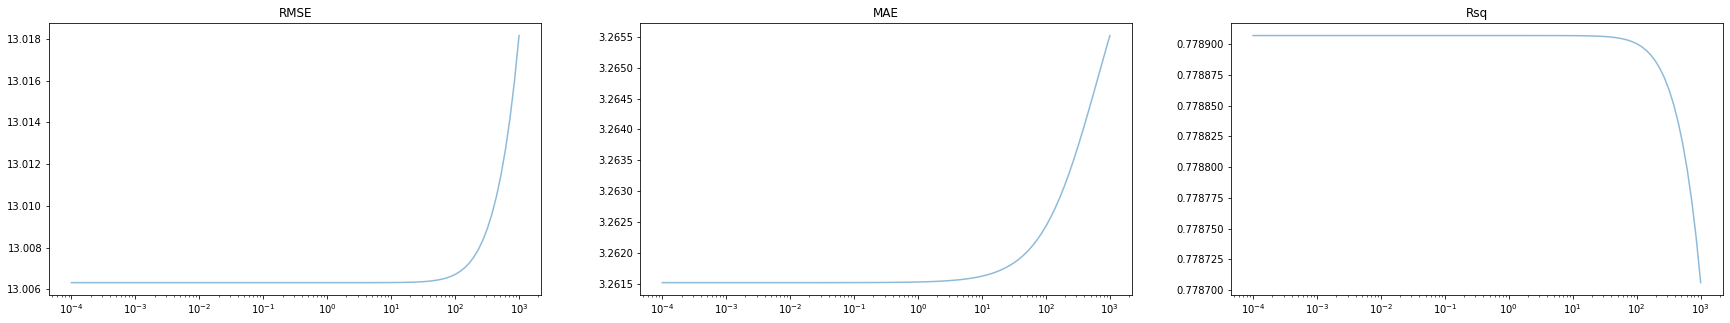

In [220]:
print(len(rmse))
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,5))
for ax,y in zip([ax1,ax2,ax3],[rmse,mae,rsq]):
    ax.plot(alphas_lasso,y,alpha=0.5)
    ax.set_xscale('log')
ax1.set_title('RMSE')
ax2.set_title('MAE')
ax3.set_title('Rsq')
plt.show()

In [222]:
alphas = np.logspace(-2, 3, 5)
for alpha in alphas:
    lasso = Ridge(alpha=alpha)
    ridge.fit(X,Y)
    print(f'Ridge, alpha={round(alpha,5)}, intercept={round(ridge.intercept_,2)}, coefficients={ridge.coef_}, rmse={mean_squared_error(Y,ridge.predict(X))}')
lr = LinearRegression()
lr.fit(X,Y)
print(f'Linear Regression, intercept={round(lr.intercept_,2)}, coefficients={lr.coef_}, rmse={mean_squared_error(Y,lr.predict(X))}')

Ridge, alpha=0.01, intercept=0.17, coefficients=[ 0.0164893  -0.04107874  0.14741995  0.07370997], rmse=13.018155082313179
Ridge, alpha=0.17783, intercept=0.17, coefficients=[ 0.0164893  -0.04107874  0.14741995  0.07370997], rmse=13.018155082313179
Ridge, alpha=3.16228, intercept=0.17, coefficients=[ 0.0164893  -0.04107874  0.14741995  0.07370997], rmse=13.018155082313179
Ridge, alpha=56.23413, intercept=0.17, coefficients=[ 0.0164893  -0.04107874  0.14741995  0.07370997], rmse=13.018155082313179
Ridge, alpha=1000.0, intercept=0.17, coefficients=[ 0.0164893  -0.04107874  0.14741995  0.07370997], rmse=13.018155082313179
Linear Regression, intercept=0.24, coefficients=[ 0.04766321 -0.05252104  0.14850053  0.07425027], rmse=13.006323124645764


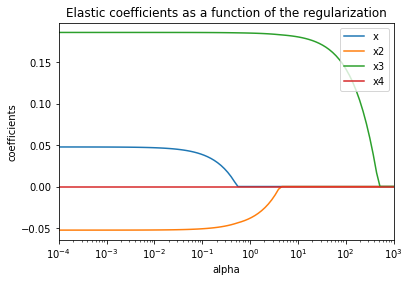

In [225]:
alphas_elastic = np.logspace(-4, 3, 100)
coef_elastic = []
elastic = ElasticNet()
rmse, mae, rsq = [], [], []
for i in alphas_lasso:
    elastic.set_params(alpha = i).fit(X,Y)
    coef_elastic.append(elastic.coef_)
    y_train_pred = elastic.predict(X)

    rmse.append(mean_squared_error(Y,y_train_pred))  #Calculate root-mean-squared-error
    mae.append(mean_absolute_error(Y,y_train_pred))  #Calculate mean-absolute-error
    rsq.append(r2_score(Y,y_train_pred))             #Calculate R^2
    
features = ['x','x2','x3','x4']
df_coef = pd.DataFrame(coef_elastic, index=alphas_elastic, columns=features)
title = 'Elastic coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [229]:
alphas = np.logspace(-2, 3, 5)
for alpha in alphas:
    elastic = ElasticNet(alpha=alpha)
    elastic.fit(X,Y)
    print(f'Elastic, alpha={round(alpha,5)}, intercept={round(elastic.intercept_,2)}, coefficients={elastic.coef_}, rmse={mean_squared_error(Y,elastic.predict(X))}')
lr = LinearRegression()
lr.fit(X,Y)
print(f'Linear Regression, intercept={round(lr.intercept_,2)}, coefficients={lr.coef_}, rmse={mean_squared_error(Y,lr.predict(X))}')

Elastic, alpha=0.01, intercept=0.24, coefficients=[ 0.04674513 -0.05235867  0.18561665  0.        ], rmse=13.006328837484837
Elastic, alpha=0.17783, intercept=0.22, coefficients=[ 0.03156567 -0.04964837  0.1854661   0.        ], rmse=13.008084572066696
Elastic, alpha=3.16228, intercept=-0.0, coefficients=[ 0.         -0.01232621  0.18348409  0.        ], rmse=13.084889385363315
Elastic, alpha=56.23413, intercept=-0.06, coefficients=[ 0.         -0.          0.16033351  0.        ], rmse=13.923383716994287
Elastic, alpha=1000.0, intercept=0.04, coefficients=[-0.  0.  0.  0.], rmse=58.82740534381207
Linear Regression, intercept=0.24, coefficients=[ 0.04766321 -0.05252104  0.14850053  0.07425027], rmse=13.006323124645764
